In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import sklearn

In [3]:
df = pd.read_csv("Data/Boston_Housing.csv")

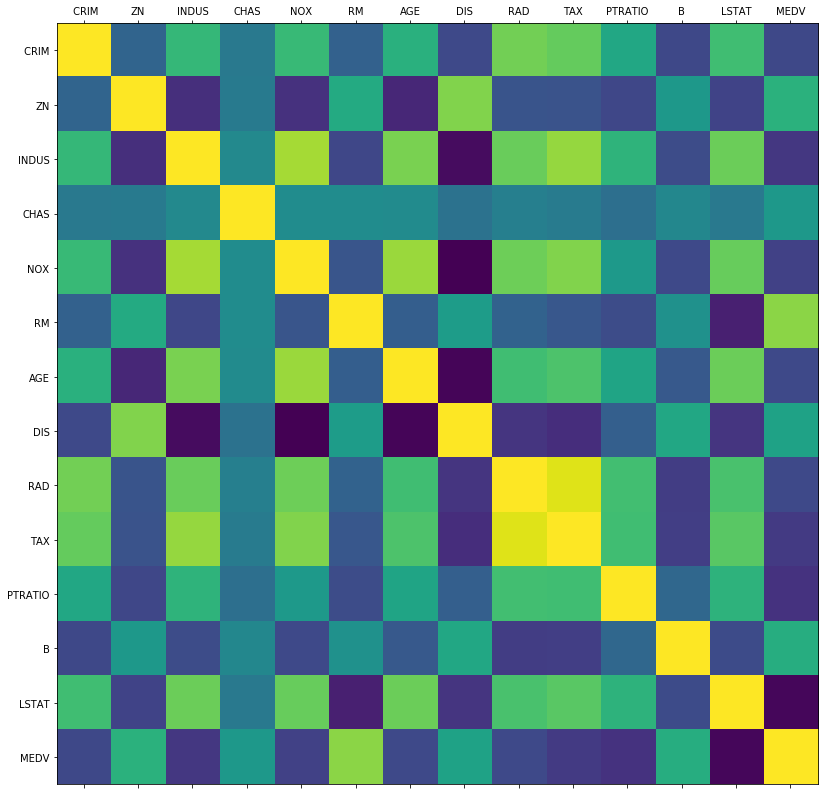

In [4]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (14,14))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [5]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
df.columns

Index([' CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
X = df[[' CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].values 
Y = df[['MEDV']].values
split_test_size = 0.30
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=split_test_size, random_state=42)

In [18]:
len(X_test)

152

In [22]:
print("# rows in dataframe {0}".format(len(df)))
for x in df.columns:
    l = len(df.loc[df[x]==0])
    if l>0:
     print("# rows missing {0}: {1}".format(x,l))


# rows in dataframe 506
# rows missing ZN: 372
# rows missing CHAS: 471
ERROR! Session/line number was not unique in database. History logging moved to new session 118


## There is nothing to impute based on the above data. Proportion of esidential land zoned for lots over 25,000 SQ FT seems like can be zero.

In [ ]:
# from sklearn.impute import SimpleImputer
# fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
# X_train = fill_0.fit_transform(X_train)
# X_test = fill_0.fit_transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lr_predict_train = LR_model.predict(X_train)

In [42]:
from sklearn.metrics import r2_score

In [45]:
print("R2: {0: 4f}".format(r2_score(Y_train, lr_predict_train)))

R2:  0.743500


In [46]:
lr_predict_test = LR_model.predict(X_test)

In [48]:
print("R2: {0: 4f}".format(r2_score(Y_test, lr_predict_test)))

R2:  0.711226


In [53]:
r2_score(Y_test, lr_predict_test)

0.7112260057484936

In [54]:
import pickle

In [88]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f, protocol=2)

In [85]:
with open('model_pickle','rb') as f:
    mod = pickle.load(f)

In [87]:
mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
from sklearn.externals import joblib
joblib.dump(LR_model, 'house_predict.pkl')

['house_predict.pkl']

In [71]:
LR_model_new = joblib.load('house_predict.pkl')

In [65]:
LR_model_new

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
lr_predict_test = LR_model_new.predict(X_test)

In [67]:
lr_predict_test

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [69]:
X_test[0]

array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
       6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
       1.6600e+01, 3.9550e+02, 9.0400e+00])

In [74]:
LR_model_new.predict([X_test[0]])

array([28.64896005])

In [82]:
X_test[0]

array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
       6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
       1.6600e+01, 3.9550e+02, 9.0400e+00])